# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image

# Gatharing

#### twitter_a (data frame)

In [2]:
twitter_a=pd.read_csv('../input/weratedogsdataset/twitter-archive-enhanced-2.csv')

## --------------------------------------------

#### image_p (data frame)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open ('image-prediction.tsv',mode='wb')as file:
    file.write(response.content)

In [4]:
image_p=pd.read_csv('image-prediction.tsv',sep='\t')

## ----------------------------------------------------

#### tweet_data(data frame)

In [5]:
list_tweet=[]
with open ('../input/weratedogsdataset/tweet-json')as file:
    for line in file:
        list_tweet.append(json.loads(line))

In [6]:
tweet_data=pd.DataFrame(list_tweet,columns=['id','retweet_count','favorite_count'])

# --------------------------------------------

# Assessing

#### twitter_a assessing

In [7]:
twitter_a.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_a.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_a[twitter_a.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

#### quality issues
    rating_numerator some times is lower than 10
    tweet_id must be string not int
    timestamp must be time not string
    unnecessary columns
    missing values in expanded_urls
    unnecessary rating_denominator column
    making name is lower for all
    'None' values in name
    "None" values in dog_stage

#### tidiness issues
    dogs kind 4 variables in 4 columns and it should be in one column

### ---------------------------------------------------------------

#### image_p Assessing

In [11]:
image_p

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
image_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_p[image_p[['tweet_id','jpg_url']].duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### quality issues
    tweet_id must be string not int

#### --------------------------------------------------------------------------

#### tweet_data Assessing

In [14]:
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [15]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
tweet_data[tweet_data.duplicated()].count()

id                0
retweet_count     0
favorite_count    0
dtype: int64

#### quality issues
    id must be string not int

#### tidiness issues
    all data is related but seperated to 3 tables

#### --------------------------------------------------------------------------------

# Cleaning

In [18]:
twitter_a_cleaning=twitter_a.copy()

In [19]:
image_p_cleaning=image_p.copy()

In [20]:
tweet_data_cleaning=tweet_data.copy()

### twitter_a quality Cleaning

###### 1:- rating_numerator some times is lower than 10
    def:adding 10 to the numerator which value is less than 10

In [21]:
cond=twitter_a_cleaning['rating_numerator']<10
col=twitter_a_cleaning[cond]
col_cleaning=col['rating_numerator']
col_cleaning=col_cleaning+10

In [22]:
twitter_a_cleaning.loc[cond,'rating_numerator']=col_cleaning

In [23]:
#testing
twitter_a_cleaning[twitter_a_cleaning['rating_numerator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 2:- tweet_id must be string not int
    def turning all wrong data types below to the right data types

In [24]:
twitter_a_cleaning['tweet_id']=twitter_a_cleaning['tweet_id'].astype(str)

##### 3:-timestamp must be time not string

In [25]:
twitter_a_cleaning['timestamp']=pd.to_datetime(twitter_a_cleaning['timestamp'])

In [26]:
#test
twitter_a_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### 4:- unnecessary columns
    def:drop all the unnecessary columns

In [27]:
twitter_a_cleaning=twitter_a_cleaning.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [28]:
#testing
twitter_a_cleaning.columns.value_counts()

rating_numerator      1
puppo                 1
floofer               1
pupper                1
source                1
text                  1
timestamp             1
rating_denominator    1
expanded_urls         1
tweet_id              1
doggo                 1
name                  1
dtype: int64

##### 5:- missing values in expanded_urls
    def:drop all missing values

In [29]:
twitter_a_cleaning=twitter_a_cleaning.dropna()

In [30]:
#testing
twitter_a_cleaning.expanded_urls.isnull().value_counts()

False    2297
Name: expanded_urls, dtype: int64

##### 6:- unnecessary rating_denominator column
    def:drop rating_denominator column

In [31]:
twitter_a_cleaning=twitter_a_cleaning.drop('rating_denominator',axis=1)

In [32]:
twitter_a_cleaning=twitter_a_cleaning.rename(columns={'rating_numerator':'rating_(over_10)'})

In [33]:
#testing
twitter_a_cleaning.columns.value_counts()

floofer             1
pupper              1
source              1
rating_(over_10)    1
text                1
timestamp           1
puppo               1
expanded_urls       1
tweet_id            1
doggo               1
name                1
dtype: int64

##### 7:-making name is lower for all
    def :lowercase all names

In [34]:
twitter_a_cleaning.name=twitter_a_cleaning.name.str.lower()

In [35]:
#test
twitter_a_cleaning.name

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351        none
2352           a
2353           a
2354           a
2355        none
Name: name, Length: 2297, dtype: object

### twitter_a tidiness Cleaning
    def:one values in four col | so will merge this four columns

In [36]:
twitter_a_cleaning=pd.melt(twitter_a_cleaning,id_vars=['tweet_id','timestamp','source','text','expanded_urls',
                                                       'rating_(over_10)','name'])

In [37]:
twitter_a_cleaning=twitter_a_cleaning.drop('variable',axis=1)
twitter_a_cleaning=twitter_a_cleaning.rename(columns={'value':'dog_stage'})

In [38]:
#testing
twitter_a_cleaning.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage
8097,712065007010385924,2016-03-21 23:55:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,https://twitter.com/dog_rates/status/712065007...,16,chester,None
7674,771102124360998913,2016-08-31 21:47:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12,charlie,None
7616,778748913645780993,2016-09-22 00:13:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Mya (pronounced ""mmmyah?""). Her head i...",https://twitter.com/dog_rates/status/778748913...,11,mya,None
5897,704871453724954624,2016-03-02 03:30:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,none,None
6502,673352124999274496,2015-12-06 04:03:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny screech and then goes into co...,https://twitter.com/dog_rates/status/673352124...,12,none,None


###### 8:- 'None' values in name | quality cleaning (continued)
    def : remove all the 'none' values

In [39]:
index_arr=twitter_a_cleaning[twitter_a_cleaning['name']=='none'].index
twitter_a_cleaning=twitter_a_cleaning.drop(index_arr)

In [40]:
#testing
twitter_a_cleaning[twitter_a_cleaning['name']=='none']

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage


###### 9:-"None" values in dog_stage
    def : remove all the 'none' values

In [41]:
index_arr=twitter_a_cleaning[twitter_a_cleaning['dog_stage']=='None'].index
twitter_a_cleaning=twitter_a_cleaning.drop(index_arr)

In [42]:
#testing
twitter_a_cleaning[twitter_a_cleaning['dog_stage']=='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage


In [43]:
twitter_a_cleaning=twitter_a_cleaning.drop_duplicates()

###### --------------------------------------------------------------------------------

### image_P quality Cleaning

###### tweet_id must be string not int
    def:turning wrong data type below to the right data type

In [44]:
image_p_cleaning['tweet_id']=image_p_cleaning['tweet_id'].astype(str)

In [45]:
#test
image_p_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


###### drop false,false,false p1_dog
    def:drop unnecessary all false results

In [46]:
false=(image_p_cleaning['p1_dog']==False )& (image_p_cleaning['p2_dog'] == False)&(image_p_cleaning['p3_dog'] == False)
false_index=image_p_cleaning[false].index
image_p_cleaning=image_p_cleaning.drop(false_index)

In [47]:
#test
image_p_cleaning[image_p_cleaning[(image_p_cleaning['p1_dog']==False )&
                                  (image_p_cleaning['p2_dog'] == False)&(image_p_cleaning['p3_dog'] == False)]].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

###### --------------------------------------------------------------------------------

### tweet_data quality cleaning

###### id must be string not int
    def:turning wrong data type below to the right data type

In [48]:
tweet_data_cleaning['id']=tweet_data_cleaning['id'].astype(str)

In [49]:
#testing
tweet_data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


###### rename id to tweet_id

In [50]:
tweet_data_cleaning=tweet_data_cleaning.rename(columns={'id':'tweet_id'})

In [51]:
#testing
tweet_data_cleaning.columns.value_counts()

tweet_id          1
retweet_count     1
favorite_count    1
dtype: int64

###### --------------------------------------------------------------------------------

### all data tidiness issue

###### all data is related but seperated to 3 tables
    def:left join the three tables on tweet_id

In [52]:
the_final_data=pd.merge(twitter_a_cleaning,image_p_cleaning,on='tweet_id',how='left')

In [53]:
the_final_data=pd.merge(the_final_data,tweet_data_cleaning,on='tweet_id',how='left')

In [54]:
#testing
the_final_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
37,777953400541634568,2016-09-19 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,https://twitter.com/dog_rates/status/768193404...,18,gerald,doggo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4080,0
189,673707060090052608,2015-12-07 03:34:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10,raymond,pupper,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1.0,...,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True,434,1177
150,689143371370250240,2016-01-18 17:52:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,https://twitter.com/dog_rates/status/689143371...,10,trip,pupper,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1.0,...,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True,579,2232
45,750011400160841729,2016-07-04 17:00:26+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,piper,doggo,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1.0,...,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False,1035,3568
148,689905486972461056,2016-01-20 20:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,https://twitter.com/dog_rates/status/689905486...,11,gizmo,pupper,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4.0,...,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True,787,2651


In [55]:
the_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          226 non-null    object             
 1   timestamp         226 non-null    datetime64[ns, UTC]
 2   source            226 non-null    object             
 3   text              226 non-null    object             
 4   expanded_urls     226 non-null    object             
 5   rating_(over_10)  226 non-null    int64              
 6   name              226 non-null    object             
 7   dog_stage         226 non-null    object             
 8   jpg_url           171 non-null    object             
 9   img_num           171 non-null    float64            
 10  p1                171 non-null    object             
 11  p1_conf           171 non-null    float64            
 12  p1_dog            171 non-null    object             
 13  p2   

###### some tweet_id didn't match so some missing values just appeared ,so will drop it 

In [56]:
the_final_data=the_final_data.dropna()

In [57]:
the_final_data['p1_dog']=the_final_data['p1_dog'].astype(bool)
the_final_data['p2_dog']=the_final_data['p2_dog'].astype(bool)
the_final_data['p3_dog']=the_final_data['p3_dog'].astype(bool)

In [58]:
#testing
the_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 225
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          171 non-null    object             
 1   timestamp         171 non-null    datetime64[ns, UTC]
 2   source            171 non-null    object             
 3   text              171 non-null    object             
 4   expanded_urls     171 non-null    object             
 5   rating_(over_10)  171 non-null    int64              
 6   name              171 non-null    object             
 7   dog_stage         171 non-null    object             
 8   jpg_url           171 non-null    object             
 9   img_num           171 non-null    float64            
 10  p1                171 non-null    object             
 11  p1_conf           171 non-null    float64            
 12  p1_dog            171 non-null    bool               
 13  p2   

In [59]:
the_final_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
27,813910438903693312,2016-12-28 00:52:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,https://twitter.com/dog_rates/status/813910438...,11,chubbs,doggo,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1.0,...,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True,2194,10342
186,674038233588723717,2015-12-08 01:30:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,https://twitter.com/dog_rates/status/674038233...,12,kaiya,pupper,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1.0,...,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True,456,1176
115,735137028879360001,2016-05-24 15:55:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,https://twitter.com/dog_rates/status/735137028...,19,buckley,pupper,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1.0,...,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True,1092,3428
158,685943807276412928,2016-01-09 21:58:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,18,the,pupper,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1.0,...,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True,696,1801
61,876838120628539392,2017-06-19 16:24:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,ginger,pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1.0,...,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,3506,21125


#### now changing the row index to a numbers from 1 to 171

In [60]:
row_index=np.arange(1,172)

In [61]:
the_final_data.index=row_index

## last check

In [62]:
the_final_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
2,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327,16476
5,851953902622658560,2017-04-12 00:23:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,astrid,doggo,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,10706,0


In [63]:
the_final_data.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_(over_10),name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
167,787717603741622272,2016-10-16 18:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,tonks,puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3.0,...,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True,3240,11416
168,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,cooper,puppo,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1.0,...,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,1480,5610
169,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,19,abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,716,3277
170,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,...,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,1366,4624
171,738537504001953792,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,bayley,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,...,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,1759,5575


#### nice&clean DataFrame :) 

#### now turning it into a csv file

In [64]:
the_final_data.to_csv(r'C:\Users\Hello\OneDrive - Alexandria University\Desktop\the_final_data.csv', index = False)

# visualization

###### percantage of dog stages

In [65]:
x=the_final_data['dog_stage'].value_counts()

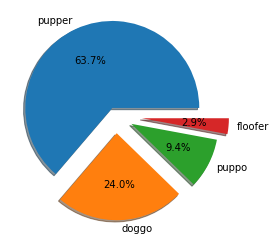

In [66]:
plt.pie(x,labels=['pupper','doggo','puppo','floofer'],shadow=True,explode=(.1,.2,.2,.3),autopct='%1.1f%%')
plt.show()

#### so..
    -pupper is the biggest percentage
    -floofer is the lowest

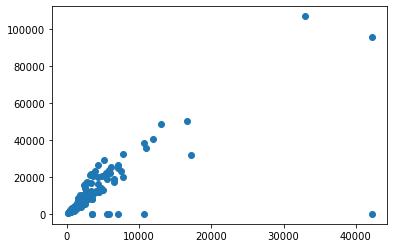

In [67]:
plt.scatter(the_final_data.retweet_count,the_final_data.favorite_count)
plt.show()

#### -there is a positive correlation between retweet count and favorate count

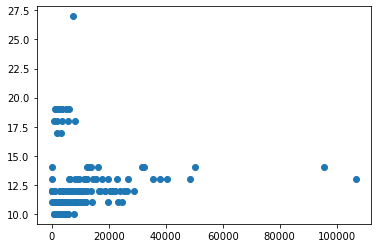

In [68]:
plt.scatter(the_final_data.favorite_count,the_final_data['rating_(over_10)'])
plt.show()